<a href="https://colab.research.google.com/github/sougatadutta0199/Stock-Price-Prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [13]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


quandl.ApiConfig.api_key = 'fjPosgdBswVSzXYAbEwB'

df = quandl.get('WIKI/AMZN')
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


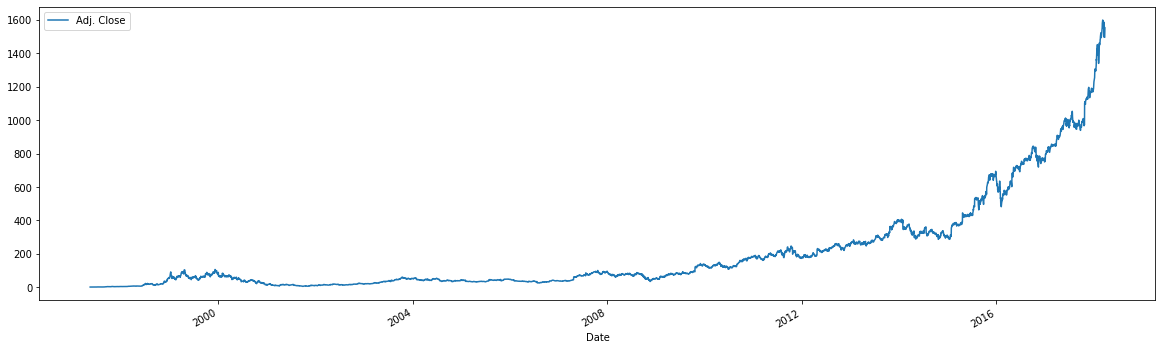

In [3]:
df['Adj. Close'].plot(figsize=(20,6))
plt.legend(loc='upper left')
plt.show()

In [4]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
forecast_predicted = clf.predict(X_forecast)
forecast_predicted

array([1501.21607756, 1540.08751498, 1551.48086732, 1537.576935  ,
       1558.49134276, 1573.99098269, 1575.94838403, 1592.16077336,
       1615.51129474, 1604.90515815, 1605.40514654, 1585.19285013,
       1592.42672463, 1617.27721117, 1632.20239636, 1640.0320017 ,
       1647.32970451, 1676.08435567, 1696.82855462, 1685.96710481,
       1688.96703512, 1679.73320708, 1668.41432109, 1639.95753535,
       1684.19055034, 1679.24385674, 1639.07457714, 1587.43747883,
       1651.58492481, 1589.02254839])

(736445.0, 737192.5)

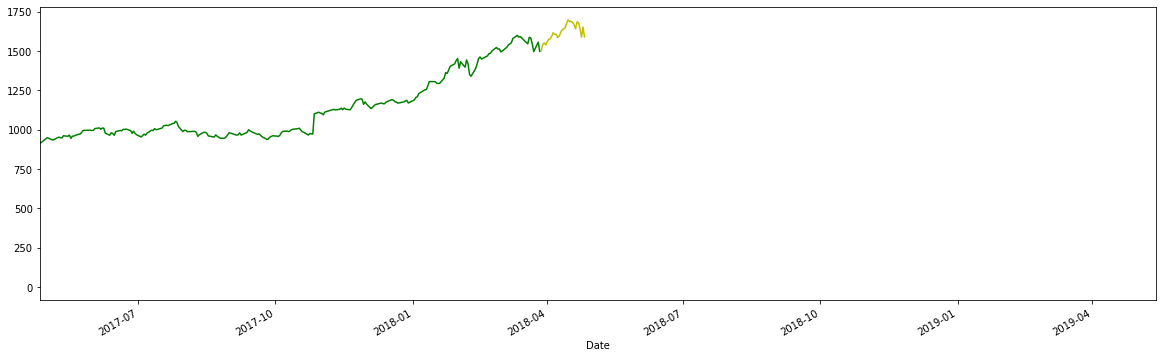

In [15]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g', figsize=(20,6))
plt.xlim(xmin=datetime.date(2017,4,26))